# NLP PROJECT

## EMAILS

## Business Objective

### Inappropriate emails would demotivates and spoil the positive environment that would lead to more attrition rate and low productivity and Inappropriate emails could be on form of bullying, racism, sexual favourtism and hate in the gender or culture, in today’s world so dominated by email no organization is immune to these hate emails.
The goal of the project is to identify such emails in the given day based on the above inappropriate content.

### Data Set Details

The dataset contains around 20 lakh emails generated by employees of an organization.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import string
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from textblob import TextBlob

## Load The Data

In [2]:
import csv
email = pd.read_csv("emails")

In [3]:
email

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


# EDA

In [4]:
email.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [5]:
email.tail()

,Unnamed: 0,filename,Message-ID,content,Class
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive
48075,48075,campbell-l/notes_inbox/137.,<10677824.1075857876692.JavaMail.evans@thyme>,---------------------- Forwarded by Tamara Jae...,Non Abusive


In [6]:
email.columns

Index(['Unnamed: 0', 'filename', 'Message-ID', 'content', 'Class'], dtype='object')

In [7]:
email.shape

(48076, 5)

In [8]:
email.describe()

,Unnamed: 0
count,48076.000000
mean,24037.500000
std,13878.490108
min,0.000000
25%,12018.750000
50%,24037.500000
75%,36056.250000
max,48075.000000


In [9]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [10]:
email.isnull().sum()

Unnamed: 0    0
filename      0
Message-ID    0
content       0
Class         0
dtype: int64

In [11]:
email.dtypes

Unnamed: 0     int64
filename      object
Message-ID    object
content       object
Class         object
dtype: object

In [12]:
email.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48071    False
48072    False
48073    False
48074    False
48075    False
Length: 48076, dtype: bool

In [13]:
email.duplicated().value_counts()

False    48076
dtype: int64

In [14]:
email["Class"].value_counts()

Non Abusive    44666
Abusive         3410
Name: Class, dtype: int64

In [15]:
email["filename"].value_counts

<bound method IndexOpsMixin.value_counts of 0            arnold-j/_sent_mail/34.
1           arnold-j/_sent_mail/517.
2           arnold-j/_sent_mail/743.
3           arnold-j/_sent_mail/766.
4           arnold-j/_sent_mail/797.
                    ...             
48071    campbell-l/notes_inbox/133.
48072    campbell-l/notes_inbox/134.
48073    campbell-l/notes_inbox/135.
48074    campbell-l/notes_inbox/136.
48075    campbell-l/notes_inbox/137.
Name: filename, Length: 48076, dtype: object>

In [16]:
email["Message-ID"].value_counts

<bound method IndexOpsMixin.value_counts of 0        <15267340.1075857594923.JavaMail.evans@thyme>
1        <15539583.1075857652152.JavaMail.evans@thyme>
2         <4339799.1075857657711.JavaMail.evans@thyme>
3        <25574783.1075857658215.JavaMail.evans@thyme>
4        <19506151.1075857658895.JavaMail.evans@thyme>
                             ...                      
48071     <6503484.1075857876489.JavaMail.evans@thyme>
48072    <17277180.1075857876513.JavaMail.evans@thyme>
48073    <31066400.1075857876537.JavaMail.evans@thyme>
48074    <26024436.1075857876659.JavaMail.evans@thyme>
48075    <10677824.1075857876692.JavaMail.evans@thyme>
Name: Message-ID, Length: 48076, dtype: object>

### After completing EDA we get an overview about the data. SO column name as "filename" and "Message-ID" does not have more contribution to the data. so in data cleaning part we will drop them

## Data Cleaning on Dataset

In [17]:
# Drop the first three columns

email.drop(columns=['Unnamed: 0', 'filename', 'Message-ID'], inplace=True)

In [18]:
email.sample(5)

,content,Class
30864,I know that over the past few weeks you have b...,Non Abusive
32234,"Methodologies may change, but keeping you post...",Non Abusive
39671,"Lindy, attached is the budget that was verbaly...",Non Abusive
41832,\n\nWe are in the process of rescheduling the ...,Non Abusive
13802,"Hey Mom,\n\nCan you send me the flight numbers...",Non Abusive


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
email['Class'] = encoder.fit_transform(email['Class'])

In [21]:
email.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [22]:
## Missing value
email.isnull().sum()

content    0
Class      0
dtype: int64

In [23]:
## Check for duplicate values
email.duplicated().sum()

23420

In [24]:
## Remove Duplicates
email=email.drop_duplicates(keep='first')

In [25]:
email.duplicated().sum()

0

In [26]:
email.shape

(24656, 2)

## After cleaning the Data Set

## EDA

In [27]:
email.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [28]:
email['Class'].value_counts()

1    23014
0     1642
Name: Class, dtype: int64

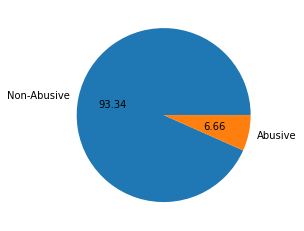

In [29]:
import matplotlib.pyplot as plt
plt.pie(email['Class'].value_counts(), labels=['Non-Abusive','Abusive'], autopct="%0.2f")
plt.show()

### data is imbalance

In [30]:
import nltk

In [31]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
import warnings
warnings.filterwarnings("ignore")
email['num_characters'] = email['content'].apply(len)

In [34]:
email.head()

,content,Class,num_characters
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [35]:
## Number of words
email['num_words'] = email['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
email.head()

,content,Class,num_characters,num_words
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [37]:
email['num_sentences'] = email['content'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [38]:
email.head()

,content,Class,num_characters,num_words,num_sentences
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [39]:
email[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.321017,12.479031
std,5394.644531,818.334355,26.660055
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32337.000000,1084.000000


In [40]:
## Abusive
email[email['Class'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.696102,16.905603
std,2834.633786,590.600439,32.147667
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,339.000000


In [41]:
## Non-Abusive
email[email['Class'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.151560,12.163205
std,5532.160062,832.213721,26.196939
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32337.000000,1084.000000


In [42]:
import seaborn as sns


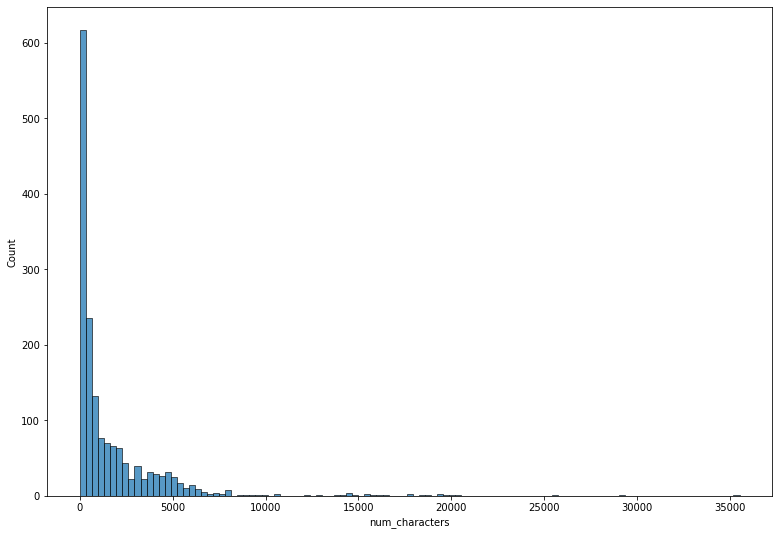

In [43]:
plt.figure(figsize=(13,9))
sns.histplot(email[email['Class'] == 0]['num_characters'])# Abusive

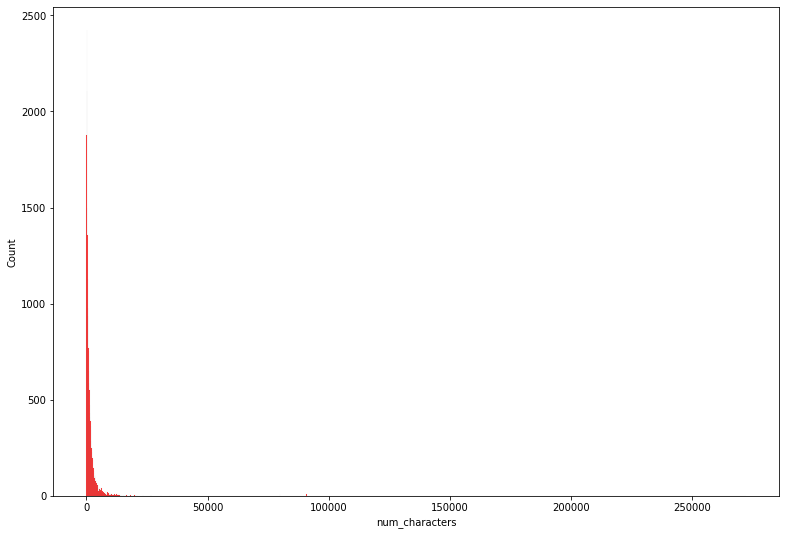

In [44]:
plt.figure(figsize=(13,9))
sns.histplot(email[email['Class'] == 1]['num_characters'],color='red')# Non-Abusive

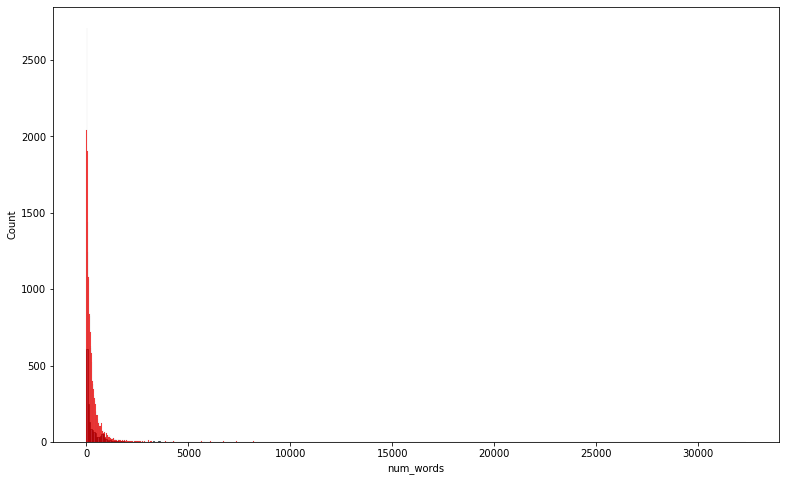

In [45]:
plt.figure(figsize=(13,8))
sns.histplot(email[email['Class'] == 0]['num_words'])# Abusive
sns.histplot(email[email['Class'] == 1]['num_words'], color='red')# Non-Abusive

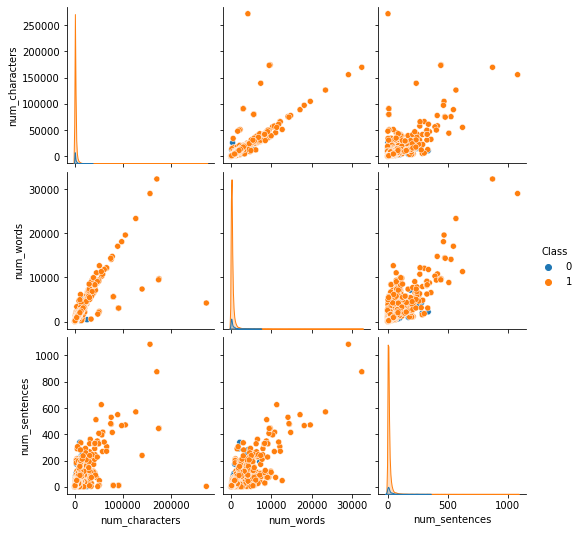

In [46]:
sns.pairplot(email,hue='Class')

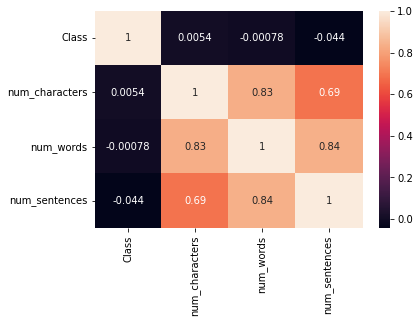

In [47]:
sns.heatmap(email.corr(),annot=True)

## Data Preprocessing

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
!pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1) Number of Words

In [51]:
#Number of Words in single tweet
import warnings
warnings.filterwarnings("ignore")
email ['word_count'] = email ['content'].apply(lambda x: len(str(x).split(" ")))
email [['content','word_count']].head()

,content,word_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,24
1,fuck you,2
2,Gentlemen:\nThe following champagne is availab...,131
3,sorry i've taken so long...just been trying to...,66
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,26


## 2) Number of Characters

In [52]:
#Number of characters in single tweet
email['char_count'] = email['content'].str.len() ## this also includes spaces
email[['content','char_count']].head()

,content,char_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,220
1,fuck you,8
2,Gentlemen:\nThe following champagne is availab...,612
3,sorry i've taken so long...just been trying to...,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,203


## 3) Average Word Length

In [53]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

email['avg_word'] = email['content'].apply(lambda x: avg_word(x))
email[['content','avg_word']].head()

,content,avg_word
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,4.648649
1,fuck you,3.500000
2,Gentlemen:\nThe following champagne is availab...,5.177778
3,sorry i've taken so long...just been trying to...,6.043478
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,4.757576


## 4) Number of Stopwords

In [54]:
stop = stopwords.words('english')

email['stopwords'] = email['content'].apply(lambda x: len([x for x in x.split() if x in stop]))
email[['content','stopwords']].head()

,content,stopwords
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,1
1,fuck you,1
2,Gentlemen:\nThe following champagne is availab...,11
3,sorry i've taken so long...just been trying to...,23
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,2


## 5) Number of Special Characters

In [55]:
email['hastags'] = email['content'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
email[['content','hastags']].head()

,content,hastags
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


## 6) Number of Numerics

In [56]:
email['numerics'] = email['content'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
email[['content','numerics']].head()

,content,numerics
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,1
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,21
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,3


## 7) Number of Upper Case Words

In [57]:
email['upper'] = email['content'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
email[['content','upper']].head()

,content,upper
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,2
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,6
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,3


## Pre-Processing

In [58]:
email['content'] = email['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
email['content'].head()

0    eat shit john j lavorato@excelr 11/18/2000 01:...
1                                             fuck you
2    gentlemen: the following champagne is availabl...
3    sorry i've taken so long...just been trying to...
4    asshole john j lavorato@excelr 12/23/2000 10:5...
Name: content, dtype: object

## Removing Punctuation

In [59]:
email['content'] = email['content'].str.replace('[^\w\s]','')
email['content'].head()

0    eat shit john j lavoratoexcelr 11182000 0101 p...
1                                             fuck you
2    gentlemen the following champagne is available...
3    sorry ive taken so longjust been trying to fen...
4    asshole john j lavoratoexcelr 12232000 1051 am...
Name: content, dtype: object

## Removal of Stop Words

In [60]:
stop = stopwords.words('english')
email['content'] = email['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
email['content'].head()

0    eat shit john j lavoratoexcelr 11182000 0101 p...
1                                                 fuck
2    gentlemen following champagne available 70 app...
3    sorry ive taken longjust trying fend chicks li...
4    asshole john j lavoratoexcelr 12232000 1051 jo...
Name: content, dtype: object

## Common Word Removal

In [61]:
freq = pd.Series(' '.join(email['content']).split()).value_counts()[:10]
freq

excelr     18487
subject    18183
please     16957
pm         16046
2001       14585
20         14037
email      13289
would      12811
message    12719
time       12278
dtype: int64

In [62]:
freq = list(freq.index)
email['content'] = email['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
email['content'].head()

0    eat shit john j lavoratoexcelr 11182000 0101 j...
1                                                 fuck
2    gentlemen following champagne available 70 app...
3    sorry ive taken longjust trying fend chicks li...
4    asshole john j lavoratoexcelr 12232000 1051 jo...
Name: content, dtype: object

## Rare Words Removal

In [63]:
freq = pd.Series(' '.join(email['content']).split()).value_counts()[-10:]
freq

hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key12429bmatt       1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key1593bbill        1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key1599btrent       1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key1028bbrett       1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key12400btony       1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key1471btony        1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key235213brod       1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key1310bmichael     1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key235122bmarvin    1
r

In [64]:
freq = list(freq.index)
email['content'] = email['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
email['content'].head()

0    eat shit john j lavoratoexcelr 11182000 0101 j...
1                                                 fuck
2    gentlemen following champagne available 70 app...
3    sorry ive taken longjust trying fend chicks li...
4    asshole john j lavoratoexcelr 12232000 1051 jo...
Name: content, dtype: object

## Spelling Correction

In [65]:
email['content'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    eat shit john j lavoratoexcelr 11182000 0101 j...
1                                                 fuck
2    gentlemen following champagne available 70 app...
3    sorry give taken longus trying end checks life...
4    ashore john j lavoratoexcelr 12232000 1051 joh...
Name: content, dtype: object

## Tokenization

In [66]:
import nltk 
nltk.download('punkt')
TextBlob(email['content'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['fuck'])

## Stemming

In [67]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
email['content'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


0    eat shit john j lavoratoexcelr 11182000 0101 j...
1                                                 fuck
2    gentlemen follow champagn avail 70 approxim re...
3    sorri ive taken longjust tri fend chick life s...
4    asshol john j lavoratoexcelr 12232000 1051 joh...
Name: content, dtype: object

## Lemmatization

In [68]:
from textblob import Word
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [69]:
email['content'] = email['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
email['content'].head()

0    eat shit john j lavoratoexcelr 11182000 0101 j...
1                                                 fuck
2    gentleman following champagne available 70 app...
3    sorry ive taken longjust trying fend chick lif...
4    asshole john j lavoratoexcelr 12232000 1051 jo...
Name: content, dtype: object

In [70]:
email

,content,Class,num_characters,num_words,num_sentences,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,eat shit john j lavoratoexcelr 11182000 0101 j...,0,220,44,1,24,220,4.648649,1,0,1,2
1,fuck,0,8,2,1,2,8,3.500000,1,0,0,0
2,gentleman following champagne available 70 app...,0,612,99,6,131,612,5.177778,11,0,21,0
3,sorry ive taken longjust trying fend chick lif...,0,505,163,8,66,505,6.043478,23,0,0,6
4,asshole john j lavoratoexcelr 12232000 1051 jo...,0,203,42,2,26,203,4.757576,2,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
47974,need new lead business need increased internet...,1,1523,255,12,292,1523,4.551724,67,0,13,23
47975,image image image garth brook wrapped image im...,1,1126,244,12,249,1126,4.585106,58,0,0,22
47977,imageimageimage dear smartreminders member ima...,1,892,164,9,151,892,5.627907,51,0,0,5
47980,image image image image kid rock forever image...,1,932,189,10,217,932,4.810811,44,0,0,21


# Advanced Text Processing

## N-grams

In [71]:
TextBlob(email['content'][0]).ngrams(2)

[WordList(['eat', 'shit']),
 WordList(['shit', 'john']),
 WordList(['john', 'j']),
 WordList(['j', 'lavoratoexcelr']),
 WordList(['lavoratoexcelr', '11182000']),
 WordList(['11182000', '0101']),
 WordList(['0101', 'john']),
 WordList(['john', 'arnoldhouectect']),
 WordList(['arnoldhouectect', 'cc']),
 WordList(['cc', 'football']),
 WordList(['football', 'bet']),
 WordList(['bet', '200']),
 WordList(['200', 'minn']),
 WordList(['minn', '95']),
 WordList(['95', 'buff']),
 WordList(['buff', '25']),
 WordList(['25', 'phil']),
 WordList(['phil', '7']),
 WordList(['7', 'indi']),
 WordList(['indi', '45']),
 WordList(['45', 'cinnci']),
 WordList(['cinnci', '7']),
 WordList(['7', 'det']),
 WordList(['det', '6']),
 WordList(['6', 'clev']),
 WordList(['clev', '16']),
 WordList(['16', 'den']),
 WordList(['den', '95']),
 WordList(['95', 'dall']),
 WordList(['dall', '75']),
 WordList(['75', 'jack']),
 WordList(['jack', '35'])]

## Term Frequency

### Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [72]:
tf1 = (email['content'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,fuck,1


## Inverse Document Frequency

## The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [73]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(email.shape[0]/(len(email[email['content'].str.contains(word)])))

tf1

,words,tf,idf
0,fuck,1,4.770441


## Term Frequency - Inverse Document Frequency(TF_IDF)

In [74]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,fuck,1,4.770441,4.770441


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(email['content'])
vect

<24656x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 894665 stored elements in Compressed Sparse Row format>

## Bag of Words

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(email['content'])
data_bow

<24656x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 994793 stored elements in Compressed Sparse Row format>

In [77]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [78]:
Abusive_wc = wc.generate(email[email['Class'] == 0]['content'].str.cat(sep=" "))

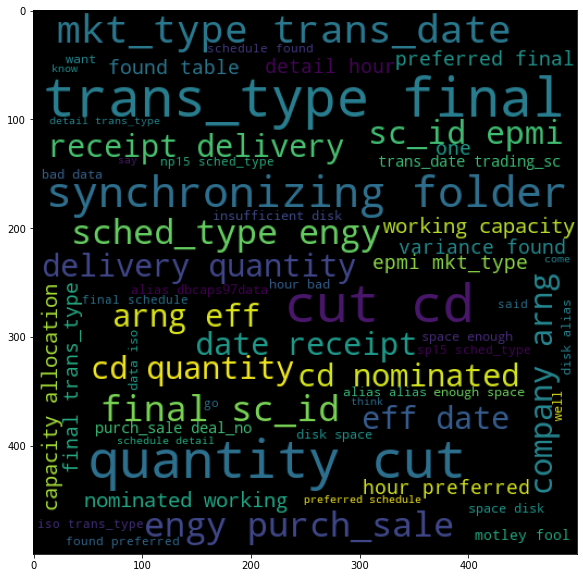

In [79]:
plt.figure(figsize=(20,10))
plt.imshow(Abusive_wc)

In [80]:
NonAbusive_wc = wc.generate(email[email['Class'] == 1]['content'].str.cat(sep=" "))

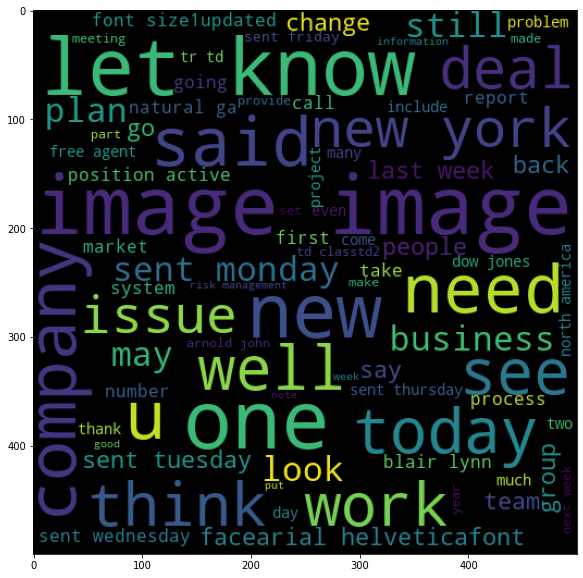

In [81]:
plt.figure(figsize=(20,10))
plt.imshow(NonAbusive_wc)

In [82]:
email.head()

,content,Class,num_characters,num_words,num_sentences,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,eat shit john j lavoratoexcelr 11182000 0101 j...,0,220,44,1,24,220,4.648649,1,0,1,2
1,fuck,0,8,2,1,2,8,3.500000,1,0,0,0
2,gentleman following champagne available 70 app...,0,612,99,6,131,612,5.177778,11,0,21,0
3,sorry ive taken longjust trying fend chick lif...,0,505,163,8,66,505,6.043478,23,0,0,6
4,asshole john j lavoratoexcelr 12232000 1051 jo...,0,203,42,2,26,203,4.757576,2,0,3,3


In [83]:

Abusive_corpus = []
for msg in email[email['Class'] ==0]['content'].tolist():
  for word in msg.split():
    Abusive_corpus.append(word)

In [84]:
Abusive_corpus

['eat',
 'shit',
 'john',
 'j',
 'lavoratoexcelr',
 '11182000',
 '0101',
 'john',
 'arnoldhouectect',
 'cc',
 'football',
 'bet',
 '200',
 'minn',
 '95',
 'buff',
 '25',
 'phil',
 '7',
 'indi',
 '45',
 'cinnci',
 '7',
 'det',
 '6',
 'clev',
 '16',
 'den',
 '95',
 'dall',
 '75',
 'jack',
 '35',
 'fuck',
 'gentleman',
 'following',
 'champagne',
 'available',
 '70',
 'approximate',
 'retail',
 'price',
 'also',
 'interest',
 'trading',
 'red',
 'wine',
 'retail',
 'price',
 'derived',
 'spec',
 'website',
 'winesearcercom',
 'wine',
 'stored',
 'temperature',
 'controlled',
 'private',
 'wine',
 'storage',
 'facility',
 'quan',
 'vintage',
 'wine',
 'retail',
 '3',
 '1990',
 'perrier',
 'jouet',
 'brut',
 'fleur',
 'de',
 'champagne',
 '110',
 '1',
 '1988',
 'piper',
 'heidsek',
 'reserve',
 '65',
 '2',
 '1990',
 'dom',
 'perignon',
 '125',
 '1',
 '1990',
 'veuve',
 'cliquot',
 'ponsardin',
 'la',
 'grande',
 'dame',
 '100',
 '1',
 '1988',
 'taittenger',
 'millesine',
 'brut',
 '85',
 '1

In [85]:
len(Abusive_corpus)

232434

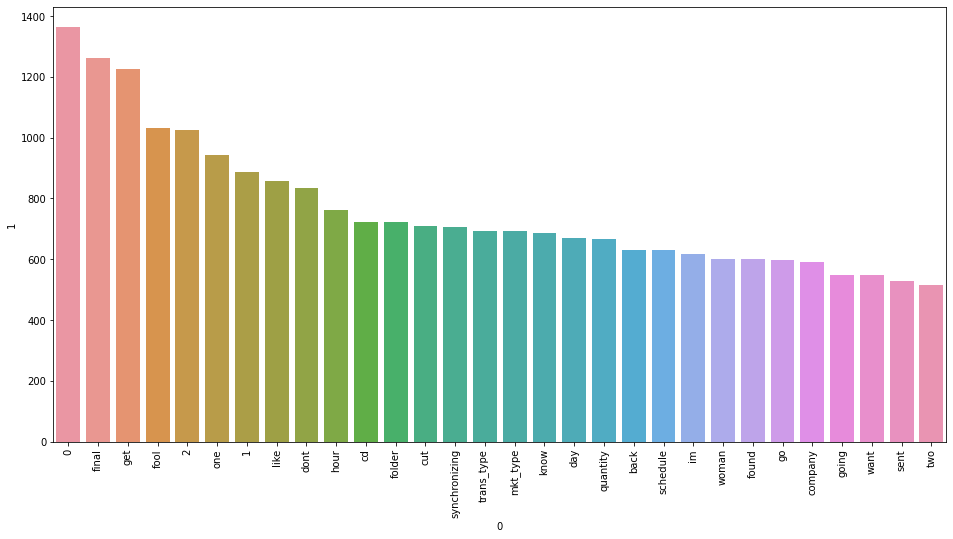

In [86]:
plt.figure(figsize=(16,8))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Abusive_corpus).most_common(30))[0],pd.DataFrame(Counter(Abusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [87]:
NonAbusive_corpus = []
for msg in email[email['Class'] ==1]['content'].tolist():
  for word in msg.split():
    NonAbusive_corpus.append(word)

In [88]:
len(NonAbusive_corpus)

3392605

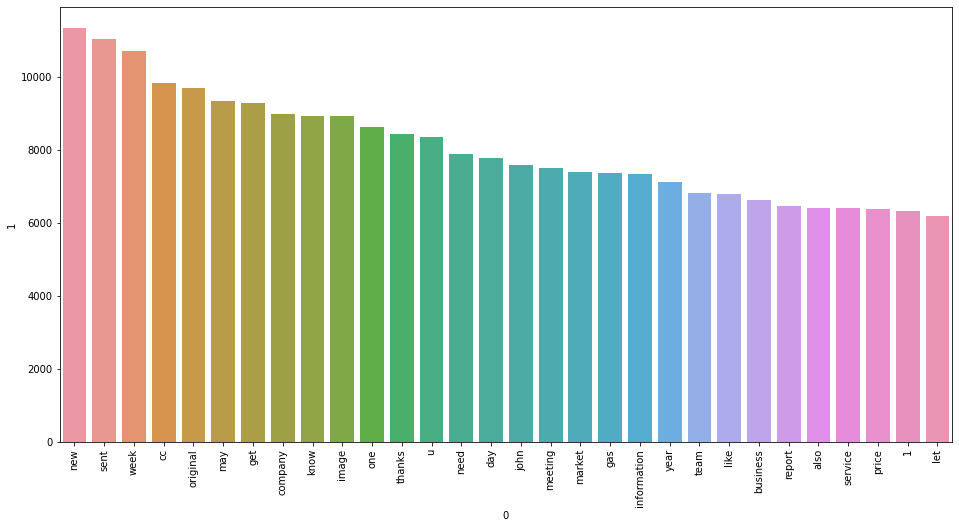

In [89]:
plt.figure(figsize=(16,8))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(NonAbusive_corpus).most_common(30))[0],pd.DataFrame(Counter(NonAbusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Feature Extractions

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email)

In [91]:
print(vectorizer.vocabulary_)

{'content': 3, 'class': 2, 'num_characters': 5, 'num_words': 7, 'num_sentences': 6, 'word_count': 11, 'char_count': 1, 'avg_word': 0, 'stopwords': 9, 'hastags': 4, 'numerics': 8, 'upper': 10}


In [92]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

[]
[]


In [93]:
print(X.toarray().shape)

(12, 12)


In [94]:
### #### Let's see how can bigrams and trigrams can be included here
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(email)

In [95]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['avg_word', 'char_count', 'class', 'content', 'hastags', 'num_characters', 'num_sentences', 'num_words', 'numerics', 'stopwords', 'upper', 'word_count']
[[0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]]


## Tfidf Vectorizer

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(email)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['avg_word', 'char_count', 'class', 'content', 'hastags', 'num_characters', 'num_sentences', 'num_words', 'numerics', 'stopwords', 'upper', 'word_count']
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [97]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [99]:
email['content'] = encoder.fit_transform(email['content'])

In [100]:
X=email.drop('Class', axis=1)
y=email['Class']

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=104)

In [102]:
email.Class.value_counts()

1    23014
0     1642
Name: Class, dtype: int64

In [103]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
NonAbusive=email[email["Class"]==1]
Abusive=email[email["Class"]==0]

In [105]:
print(NonAbusive.shape,Abusive.shape)# here is data not balanced

(23014, 12) (1642, 12)


### Here we have to handled imbalance data by using over sampling

In [106]:
from imblearn.over_sampling import RandomOverSampler



In [107]:
res=RandomOverSampler(random_state=0)
x_res,y_res=res.fit_resample(x_train,y_train)

In [108]:
x_res.shape,y_res.shape  

((36806, 11), (36806,))

In [109]:
print(y_res.value_counts())

1    18403
0    18403
Name: Class, dtype: int64


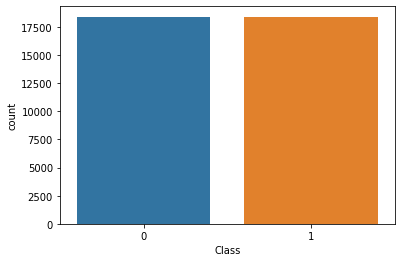

In [110]:
sns.countplot(y_res)

## smote

In [111]:
# here we are using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [112]:
from collections import Counter

In [113]:
print("Before smote :",Counter(y_train))
print("After smote :",Counter(y_train_res))

Before smote : Counter({1: 18403, 0: 1321})
After smote : Counter({1: 18403, 0: 18403})


## Model Building

## 1) Logistic regression

In [114]:
# building model 
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_res, y_res)

LogisticRegression(random_state=0)

In [115]:
y_test_pred=classifier.predict(x_test)

In [116]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#print classification report for model
print(classification_report(y_test, y_test_pred))
acc_LR = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print("accuracy_score : ", acc_LR)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)
cf_matrix=confusion_matrix(y_test_pred,y_test)
cf_matrix

              precision    recall  f1-score   support

           0       0.12      0.56      0.20       321
           1       0.96      0.72      0.82      4611

    accuracy                           0.71      4932
   macro avg       0.54      0.64      0.51      4932
weighted avg       0.90      0.71      0.78      4932

accuracy_score :  0.7055961070559611
precision_score :  0.9590235396687009
recall_score :  0.715679895901106
f1_score :  0.819672131147541


array([[ 180, 1311],
       [ 141, 3300]])

In [117]:
# building model 
#Fitting Logistic Regression to the training set 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train_res, y_train_res)
acc_LR = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print("accuracy_score : ", acc_LR)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)
cf_matrix=confusion_matrix(y_test_pred,y_test)
cf_matrix

accuracy_score :  0.7055961070559611
precision_score :  0.9590235396687009
recall_score :  0.715679895901106
f1_score :  0.819672131147541


array([[ 180, 1311],
       [ 141, 3300]])

In [118]:
y_test_pred=classifier.predict(x_test)

In [119]:
from sklearn.metrics import classification_report

#print classification report for model
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.12      0.56      0.20       321
           1       0.96      0.71      0.82      4611

    accuracy                           0.70      4932
   macro avg       0.54      0.64      0.51      4932
weighted avg       0.90      0.70      0.78      4932



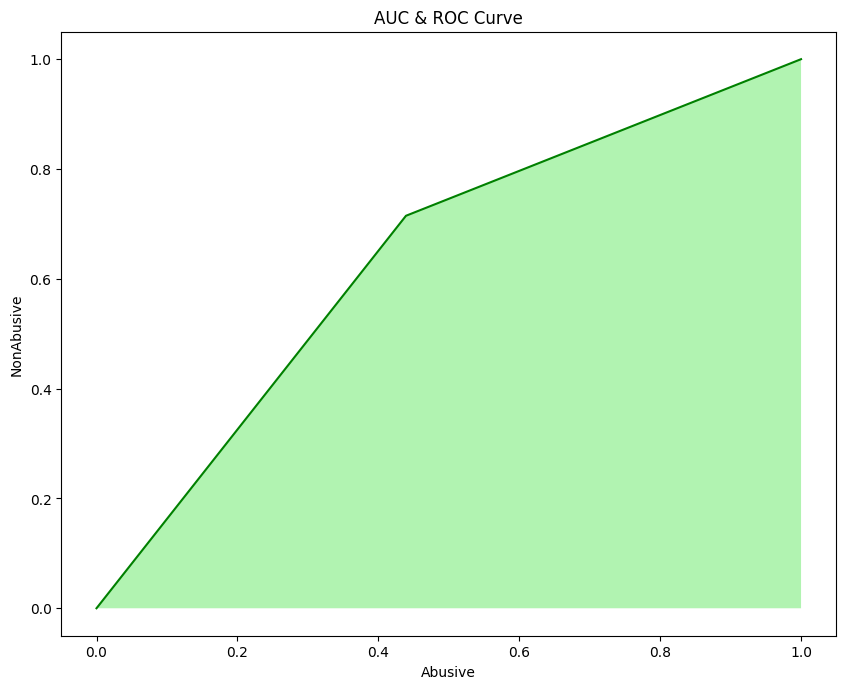

In [120]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_test_pred)

Abusive, NonAbusive, thresolds = metrics.roc_curve(y_test, y_test_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.title("AUC & ROC Curve")
plt.plot(Abusive, NonAbusive, 'g')
plt.fill_between(Abusive, NonAbusive, facecolor='lightgreen', alpha=0.7)
plt.xlabel("Abusive")
plt.ylabel("NonAbusive")
plt.show()


## 2) Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

rdf=RandomForestClassifier(n_estimators=10,max_features=3,criterion="entropy") ## Create Random forest classifer object

model_1=rdf.fit(x_res,y_res)


In [122]:
#Predict the response for test dataset
y_predict = rdf.predict(x_test)

In [123]:
y_predict

array([1, 1, 1, ..., 1, 1, 1])

In [124]:
from sklearn.metrics import classification_report

#print classification report for model
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.55      0.39      0.46       321
           1       0.96      0.98      0.97      4611

    accuracy                           0.94      4932
   macro avg       0.75      0.68      0.71      4932
weighted avg       0.93      0.94      0.93      4932



In [125]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc_RF = accuracy_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
f1 = f1_score(y_test, y_predict)
print("accuracy_score : ", acc_RF)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)

accuracy_score :  0.939375506893755
precision_score :  0.9590235396687009
recall_score :  0.9774452396443288
f1_score :  0.9678943412434232


In [126]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_predict,y_test)
cf_matrix

array([[ 126,  104],
       [ 195, 4507]])

In [127]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl', 'wb'))
pickle.dump(model_1,open('model.pkl', 'wb'))

## 3)Naive bayes

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [130]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [131]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [132]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
acc_gnb=accuracy_score(y_test,y_pred1)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.9209245742092458
[[  33  297]
 [  93 4509]]
0.9382022471910112


In [133]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
acc_mnb=accuracy_score(y_test,y_pred2)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.35827250608272504
[[ 214  116]
 [3049 1553]]
0.9304973037747154


In [134]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
acc_bnb=accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9330900243309003
[[   0  330]
 [   0 4602]]
0.9330900243309003


### Check the whole model accuracy

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [136]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [137]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [138]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [139]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9330900243309003, 0.9330900243309003)

In [140]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9330900243309003
Precision -  0.9330900243309003
For  KN
Accuracy -  0.9339010543390105
Precision -  0.9417355371900826
For  NB
Accuracy -  0.35827250608272504
Precision -  0.9304973037747154
For  DT
Accuracy -  0.9359286293592863
Precision -  0.9409465020576132
For  LR
Accuracy -  0.9326845093268451
Precision -  0.9337667614790736
For  RF
Accuracy -  0.9464720194647201
Precision -  0.9509355509355509
For  AdaBoost
Accuracy -  0.9345093268450932
Precision -  0.9363654905160106
For  BgC
Accuracy -  0.9438361719383617
Precision -  0.9509906152241918
For  ETC
Accuracy -  0.9460665044606651
Precision -  0.9477488641057414
For  GBDT
Accuracy -  0.9399837793998378
Precision -  0.941731637258925
For  xgb
Accuracy -  0.9379562043795621
Precision -  0.939443535188216


In [141]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [142]:
performance_df

,Algorithm,Accuracy,Precision
7,BgC,0.943836,0.950991
5,RF,0.946472,0.950936
8,ETC,0.946067,0.947749
1,KN,0.933901,0.941736
9,GBDT,0.939984,0.941732
3,DT,0.935929,0.940947
10,xgb,0.937956,0.939444
6,AdaBoost,0.934509,0.936365
4,LR,0.932685,0.933767
0,SVC,0.933090,0.933090


In [143]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

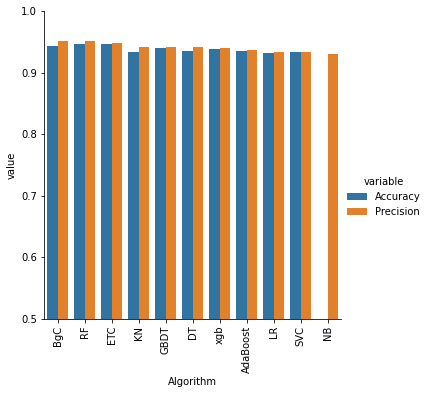

In [144]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

##4) SVM model

In [145]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [146]:
model = SVC()

model.fit(X_train, y_train)

SVC()

## Predicting the model

In [147]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

## Model Evaluation

In [148]:
print(confusion_matrix(y_test, y_pred))

[[   0  330]
 [   0 4602]]


In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       330
           1       0.93      1.00      0.97      4602

    accuracy                           0.93      4932
   macro avg       0.47      0.50      0.48      4932
weighted avg       0.87      0.93      0.90      4932



## Inference

### * Model is not predicting well, so we will improve the model by hyperparameter tunning using grid search method.

In [150]:
param_grid = {'C' : [1, 5, 7, 15], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}


In [151]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 2)

In [152]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.933 total time=  23.9s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.933 total time=  21.5s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.934 total time=  21.0s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.934 total time=  22.9s
[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.935 total time=  20.4s
[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.936 total time=  19.6s
[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.936 total time=  15.0s
[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.936 total time=  15.0s
[CV 1/2] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.937 total time=  10.5s
[CV 2/2] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.937 total time=  11.4s
[CV 1/2] END ..........C=5, gamma=1, kernel=rbf;, score=0.934 total time=  19.4s
[CV 2/2] END ..........C=5, gamma=1, kernel=rbf;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 15],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [153]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

## Model Evaluation

In [154]:
grid_pred = grid.predict(X_test)

In [155]:
grid_pred

array([1, 1, 1, ..., 1, 1, 1])

In [156]:
print(confusion_matrix(y_test, grid_pred))

[[  36  294]
 [   3 4599]]


In [157]:
print(classification_report(y_test, grid_pred))


              precision    recall  f1-score   support

           0       0.92      0.11      0.20       330
           1       0.94      1.00      0.97      4602

    accuracy                           0.94      4932
   macro avg       0.93      0.55      0.58      4932
weighted avg       0.94      0.94      0.92      4932



In [158]:
acc_svm =accuracy_score(y_test,grid_pred)

## 5)XGBoost

In [159]:
# fit model no training data
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(n_estimators=90)

In [160]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [161]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [162]:
# evaluate predictions
acc_XG = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (acc_XG * 100.0))

Accuracy: 94.16%


##6) Light GBM

In [163]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [164]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [165]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [166]:
d_train

In [167]:
params = {}
params['learning_rate'] = 0.002, # 0.1,0.3
params['boosting_type'] = 'gbdt' # dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5 
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10



In [168]:
params

{'learning_rate': (0.002,),
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'sub_feature': 0.5,
 'num_leaves': 10,
 'min_data': 50,
 'max_depth': 10}

In [169]:
clf = lgb.train(params, d_train, 1400)

In [170]:
#Prediction
y_pred = clf.predict(x_test)

In [171]:
y_pred

array([0.96478443, 0.95334669, 0.96650379, ..., 0.95884213, 0.97633662,
       0.97018368])

In [172]:
predictions = [round(value) for value in y_pred]

In [ ]:
predictions

In [174]:
from sklearn.metrics import accuracy_score

In [175]:
acc_Lightgbm = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (acc_Lightgbm * 100.0))

Accuracy: 93.58%


##7) Decision Tree Classifier

In [176]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [177]:
model

DecisionTreeClassifier(max_depth=2)

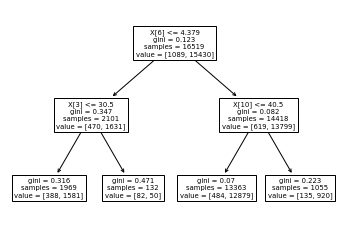

In [178]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [179]:
y_train.value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [180]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    8090
0      47
dtype: int64

In [181]:
y_test.value_counts()

1    7584
0     553
Name: Class, dtype: int64

In [182]:
preds

array([1, 1, 1, ..., 1, 1, 1])

In [183]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Class,,
0,25,528
1,22,7562


In [184]:
preds,y_test

(array([1, 1, 1, ..., 1, 1, 1]), 14008    1
 47295    1
 40157    1
 36985    1
 9586     1
         ..
 25906    1
 16998    1
 22594    1
 27688    1
 4793     1
 Name: Class, Length: 8137, dtype: int64)

In [185]:
# Accuracy 
from sklearn.metrics import accuracy_score

acc_DT = np.mean(preds==y_test),accuracy_score(y_test,preds)

In [186]:
## Building Decision Tree Classifier (CART) using Gini Criteria

In [187]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [188]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [189]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9324075211994592

## 8) Adaboost Classifier

In [190]:
# importing Adaboost Classifer
from sklearn.ensemble import AdaBoostClassifier
# Model Building
model= AdaBoostClassifier()

In [191]:
# Fitting to training set
model.fit(x_train,y_train)

AdaBoostClassifier()

In [192]:
# Predicting the train lables
y_pred_train= model.predict(x_train)

In [193]:
# checking train data score
ada_train_acc=model.score(x_train,y_train)
print('accuracy',ada_train_acc)

accuracy 0.9372843392457171


In [194]:
# Predicting the test lables
y_pred_test=model.predict(x_test)

In [195]:
# checking test data score
ada_test_acc=model.score(x_test,y_test)
print('accuracy score',ada_test_acc)

accuracy score 0.9331448936954652


In [196]:
# Taking Classification Report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.04      0.07       553
           1       0.93      1.00      0.97      7584

    accuracy                           0.93      8137
   macro avg       0.79      0.52      0.52      8137
weighted avg       0.91      0.93      0.90      8137



## 9)Neural network

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =42)

In [215]:
n_features =X.shape[1]
n_features

11

In [216]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17259, 11), (7397, 11), (17259,), (7397,))

In [217]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
import tensorflow


In [218]:
optmizer =RMSprop(0.001)#0.01 is a learning rate
model =keras.Sequential([
    keras.layers.Dense(12,input_dim =11,activation='relu'),
    keras.layers.Dense(50,activation ='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer =optmizer,loss= 'binary_crossentropy',metrics =['accuracy'])

In [219]:
seed_val =42
import random
random.seed(seed_val)
tensorflow.random.set_seed(seed_val)

In [220]:
model.fit(X_train,y_train,epochs=55)

Epoch 1/55
540/540 [==============================] - 3s 3ms/step - loss: 0.2572 - accuracy: 0.9282
Epoch 2/55
540/540 [==============================] - 1s 2ms/step - loss: 0.2469 - accuracy: 0.9326
Epoch 3/55
540/540 [==============================] - 1s 2ms/step - loss: 0.2471 - accuracy: 0.9326
Epoch 4/55
540/540 [==============================] - 1s 2ms/step - loss: 0.2469 - accuracy: 0.9326
Epoch 5/55
540/540 [==============================] - 1s 2ms/step - loss: 0.2473 - accuracy: 0.9326
Epoch 6/55
540/540 [==============================] - 1s 2ms/step - loss: 0.2474 - accuracy: 0.9326
Epoch 7/55
540/540 [==============================] - 1s 2ms/step - loss: 0.2471 - accuracy: 0.9326
Epoch 8/55
540/540 [==============================] - 1s 2ms/step - loss: 0.2474 - accuracy: 0.9326
Epoch 9/55
540/540 [==============================] - 1s 2ms/step - loss: 0.2473 - accuracy: 0.9326
Epoch 10/55
540/540 [==============================] - 1s 2ms/step - loss: 0.2474 - accuracy: 0.9326

In [221]:
acc_NN = model.evaluate(X_test,y_test)

232/232 [==============================] - 0s 1ms/step - loss: 0.2413 - accuracy: 0.9354


In [222]:
y_pred = model.predict(X_test)

232/232 [==============================] - 1s 3ms/step


In [223]:
y_pred[25]

array([0.92133284], dtype=float32)

In [224]:
y_pred

array([[0.92133284],
       [0.92133284],
       [0.92133284],
       ...,
       [0.92133284],
       [0.92133284],
       [0.92133284]], dtype=float32)

In [225]:
import pickle
pickle.dump(vectorizer_n_gram_max_features, open('tf.pkl', 'wb'))


In [226]:
final_table = pd.DataFrame({"Models":["Logistic Regression","Random Forest", "Naives Byes-gnb","Naives Byes-mnb","Naives Byes-bnb","SVM Model", "XG-boost","Light GBm","Decision Tree","ADAboost Classifier","neural network"],
                            "Accuracy":[acc_LR,acc_RF,acc_gnb,acc_mnb,acc_bnb,acc_svm,acc_XG,acc_Lightgbm,acc_DT,ada_train_acc,acc_NN]})

final_table

,Models,Accuracy
0,Logistic Regression,0.705596
1,Random Forest,0.939376
2,Naives Byes-gnb,0.920925
3,Naives Byes-mnb,0.358273
4,Naives Byes-bnb,0.93309
5,SVM Model,0.939781
6,XG-boost,0.941606
7,Light GBm,0.935849
8,Decision Tree,"(0.9324075211994592, 0.9324075211994592)"
9,ADAboost Classifier,0.937284
